# Exploratory Data Analysis

- The goal of this notebook is to find interesting relationships in the data that can be considered when building a model
- Key links:

[Read Dataset](#Read-Dataset)  
[Overivew of Dataset](#Overview-of-Dataset)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
import pandas as pd
import numpy as np
from IPython.display import Markdown
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Read Dataset



In [2]:
data=pd.read_csv("Data/hospital_readmissions.csv")

## Overview of Dataset

[Back to top](#Exploratory-Data-Analysis)  

This dataset consists of 17 variables, and the target variable is the readmitted (Y/N). There are 9 strings and 7 numeric variables. There are 25000 rows and there is no null or missing values in the dataset. 

#### 1) age - age bracket of the patient
#### 2) time_in_hospital - days (from 1 to 14)
#### 3) n_procedures - number of procedures performed during the hospital stay
#### 4) n_lab_procedures - number of laboratory procedures performed during the hospital stay
#### 5) n_medications - number of medications administered during the hospital stay
#### 6) n_outpatient - number of outpatient visits in the year before a hospital stay
#### 7) n_inpatient - number of inpatient visits in the year before the hospital stay
#### 8) n_emergency- number of visits to the emergency room in the year before the hospital stay
#### 9) medical_specialty" - the specialty of the admitting physician
#### 10) diag_1 - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
#### 11) diag_2 - secondary diagnosis
#### 12) diag_3 - additional secondary diagnosis
#### 13) glucose_test - whether the glucose serum came out as high (> 200), normal, or not performed
#### 14) A1Ctest - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
#### 15) change - whether there was a change in the diabetes medication ('yes' or 'no')
#### 16) diabetes_med - whether a diabetes medication was prescribed ('yes' or 'no')
#### 17) readmitted - if the patient was readmitted at the hospital ('yes' or 'no')

In [3]:
print(f"\033[1mDataset Shape:\033[0m {data.shape}")


Dataset Shape: (25000, 17)


### First five rows of the dataset

In [4]:
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
num_cols, num_rows = data.shape

num_cols=data.shape[1]
num_rows=data.shape[0]
Markdown(f"""
**- The number of columns is:**{num_cols:,.0f}\n
**- The number of rows is:** {num_rows}
""")


**- The number of columns is:**17

**- The number of rows is:** 25000


In [6]:
# Summary in a DataFrame
data_summary = pd.DataFrame({
    "Column": data.columns,
    "Data Type": data.dtypes,
    "Missing Values": data.isnull().sum()
})
data_summary.reset_index(drop=True, inplace=True)
data_summary

,Column,Data Type,Missing Values
0,age,object,0
1,time_in_hospital,int64,0
2,n_lab_procedures,int64,0
3,n_procedures,int64,0
4,n_medications,int64,0
5,n_outpatient,int64,0
6,n_inpatient,int64,0
7,n_emergency,int64,0
8,medical_specialty,object,0
9,diag_1,object,0


### Check for null values

In [7]:
print(data.isnull().sum())

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [8]:
# Descriptive statistics
print("\033[1mNumerical columns summary:\033[0m")
print(data.describe())

# Descriptive statistics for categorical columns
print("\n\033[1mCategorical columns summary:\033[0m")
for col in data.select_dtypes(include=('object', 'category')):  # Include both object and category types
    print(f"\n\033[1m{col}:\033[0m")
    print("Unique values:")
    print(data[col].unique())
    print("\nValue counts:")
    print(data[col].value_counts())
    print("\nMissing values:", data[col].isnull().sum())
    print(f"\nMode: {data[col].mode()[0]}")
    print("-" * 40)

Numerical columns summary:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%   

### Descriptive Analysis of Categorical Variables

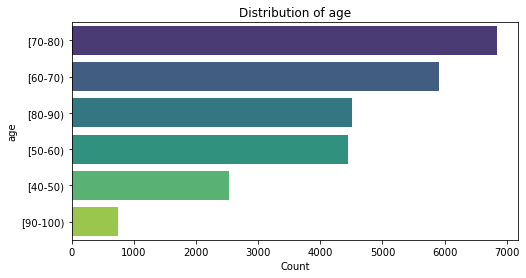

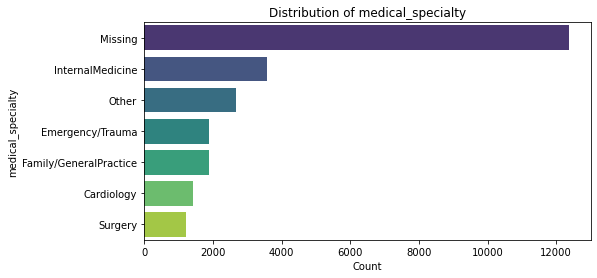

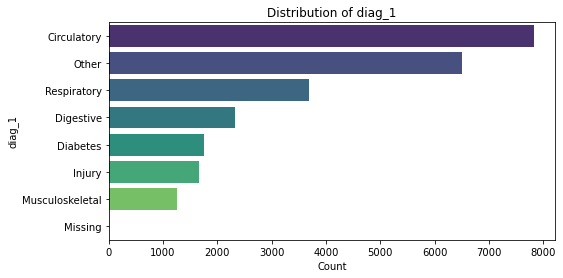

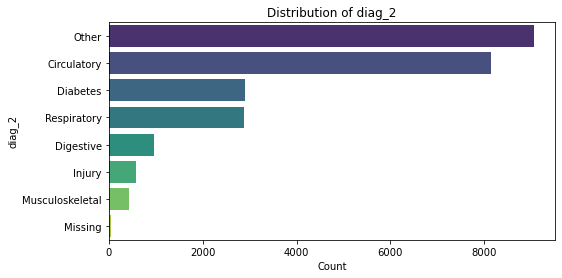

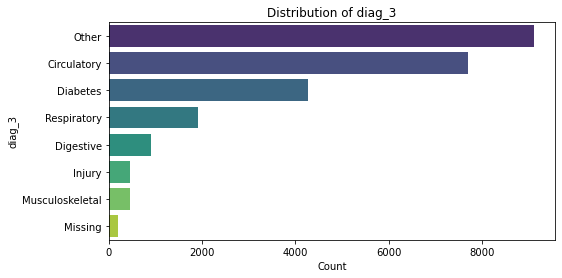

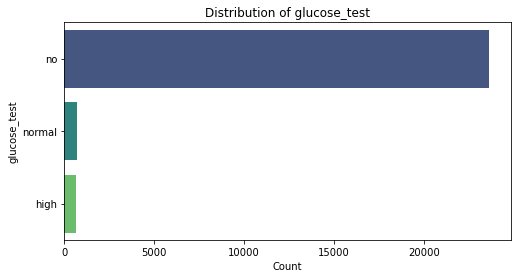

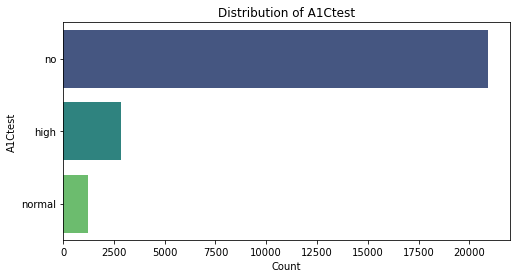

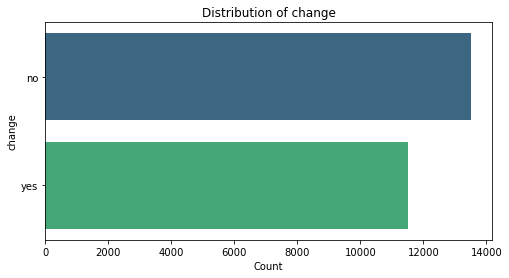

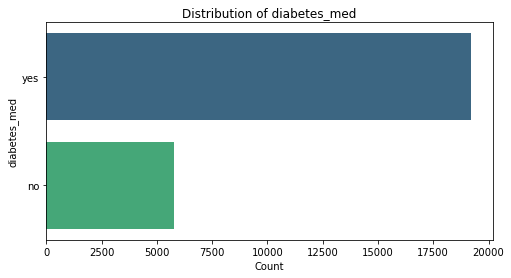

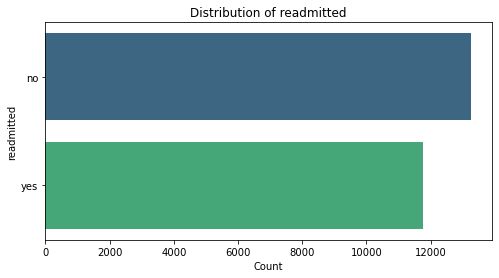

In [9]:


for col in data.select_dtypes(include=('object', 'category')):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


##### The top category of age is the age between 70-80 years old and the second group is between 60-70. The first disgnosis is circulatory, while the second and the third one, could have been other issues. Most of the patients have diabetes medicine. while for the majority of the the glocose test was Negative, and same with A1 chest test. 
















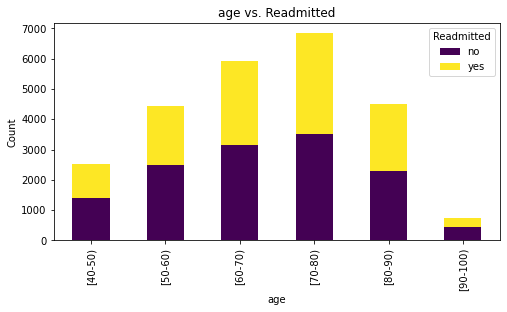

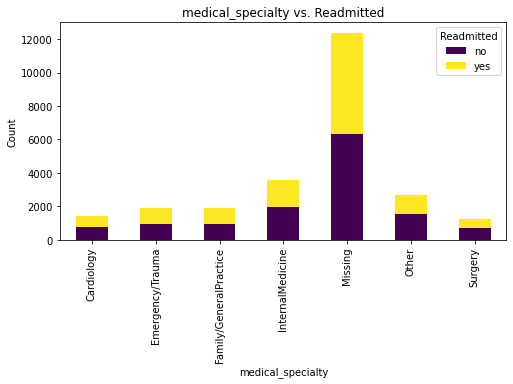

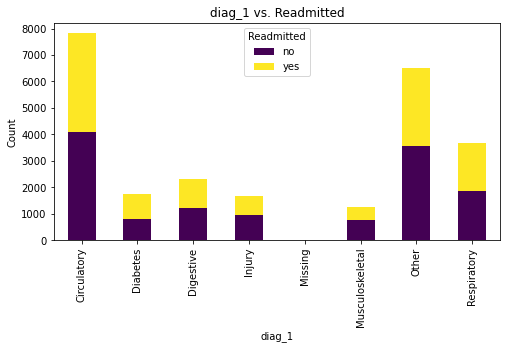

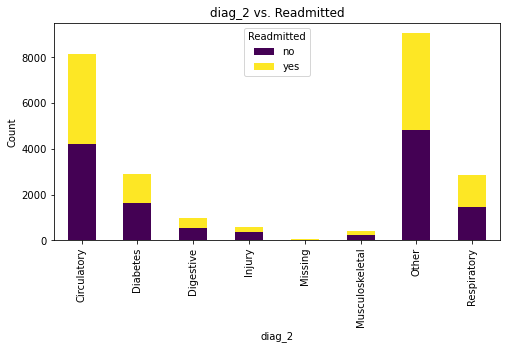

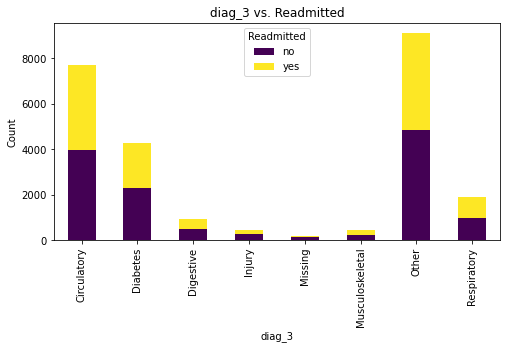

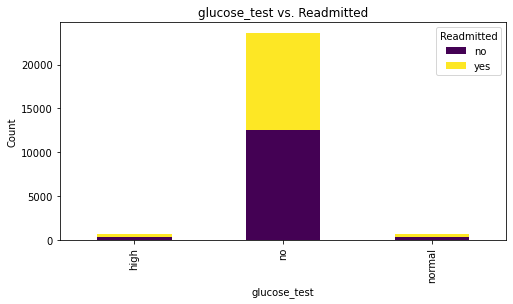

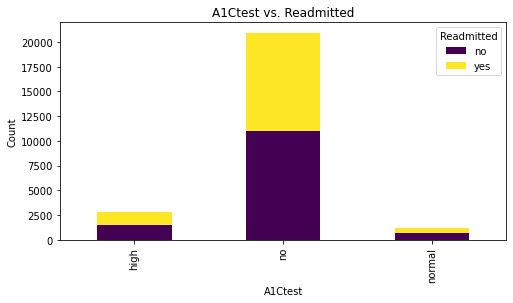

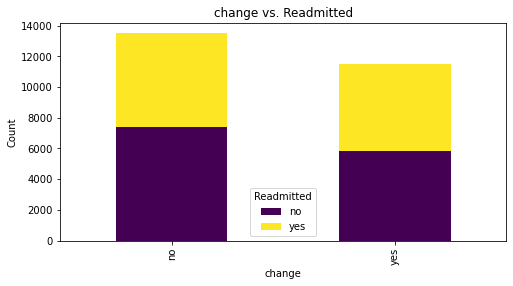

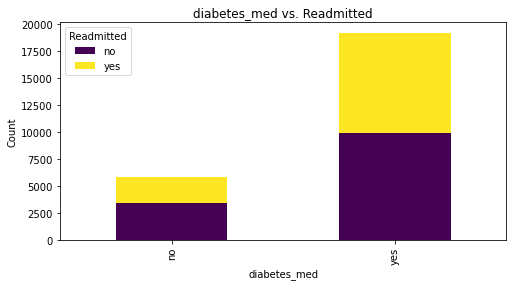

In [10]:
for col in data.select_dtypes(include=('object', 'category')):
    if col != 'readmitted':  # Example of comparing with 'readmitted'
        pd.crosstab(data[col], data['readmitted']).plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
        plt.title(f"{col} vs. Readmitted")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title="Readmitted")
        plt.show()


##### The most significant observation in the distrubtion of the categorical variables against the readmitted variables, is that the the 
##### rate of readmitted is same for each group. In other word, the percentage of readmitted or not readmitted is distributed almost 
##### equally at each group. so, non of the factors seem very significant in the chance of readmission. 

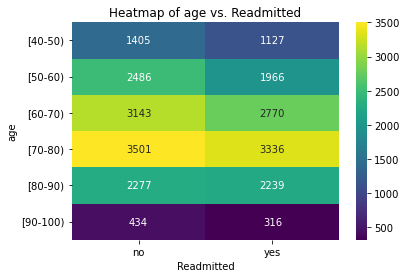

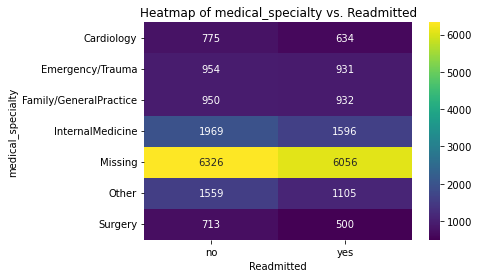

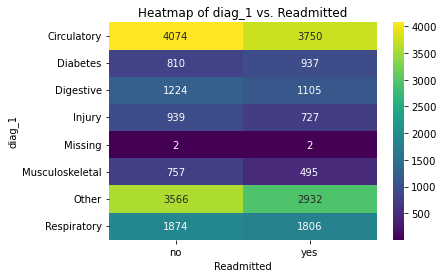

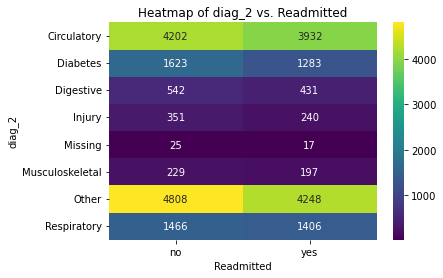

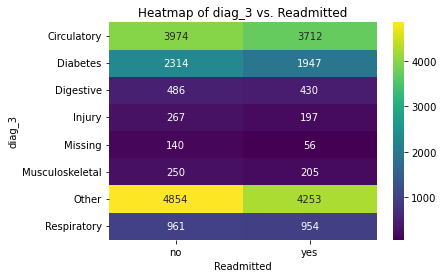

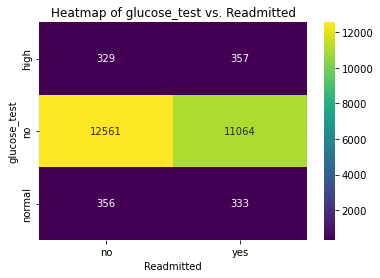

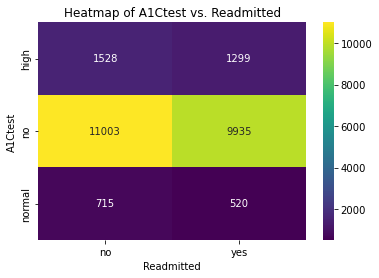

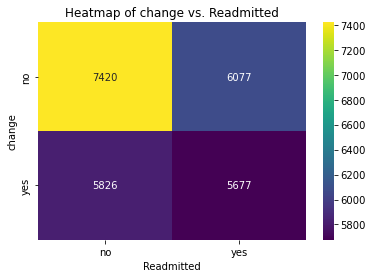

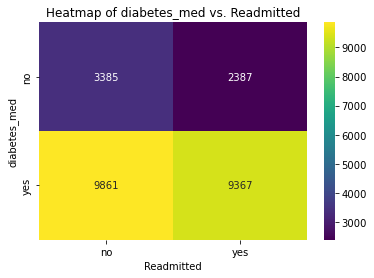

In [11]:
for col in data.select_dtypes(include=('object', 'category')):
    if col != 'readmitted':  # Example of relationship with 'readmitted'
        cross_tab = pd.crosstab(data[col], data['readmitted'])
        sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
        plt.title(f"Heatmap of {col} vs. Readmitted")
        plt.xlabel("Readmitted")
        plt.ylabel(col)
        plt.show()

age


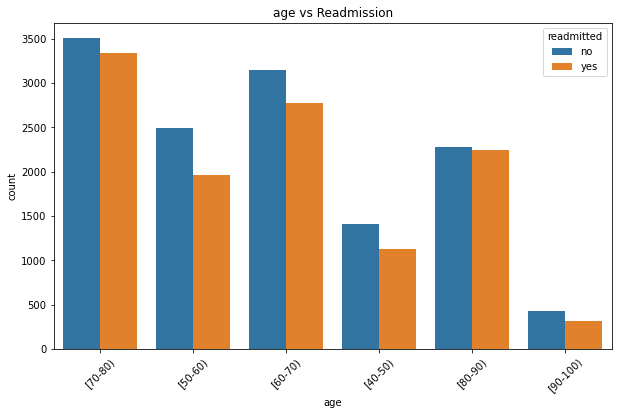

medical_specialty


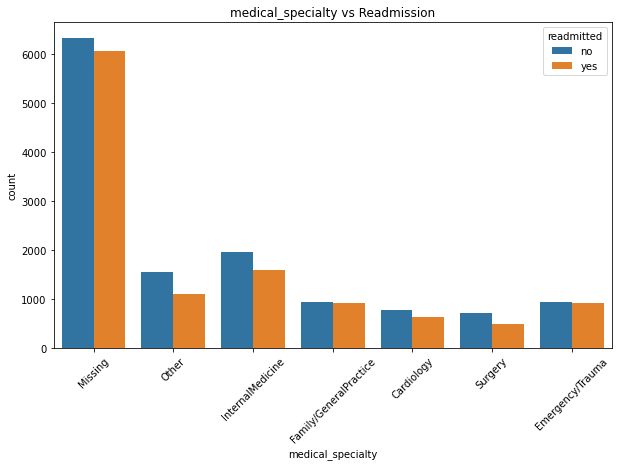

diag_1


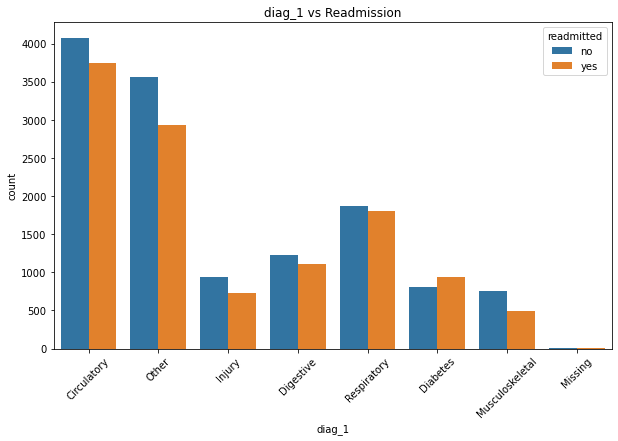

diag_2


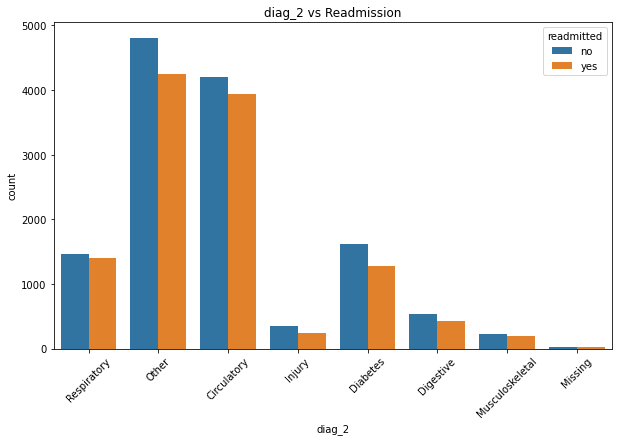

diag_3


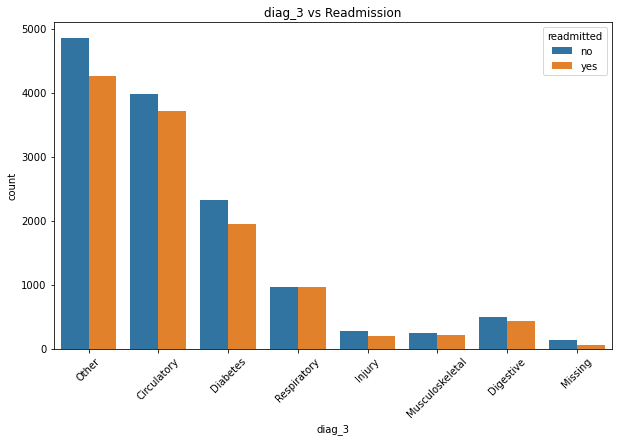

glucose_test


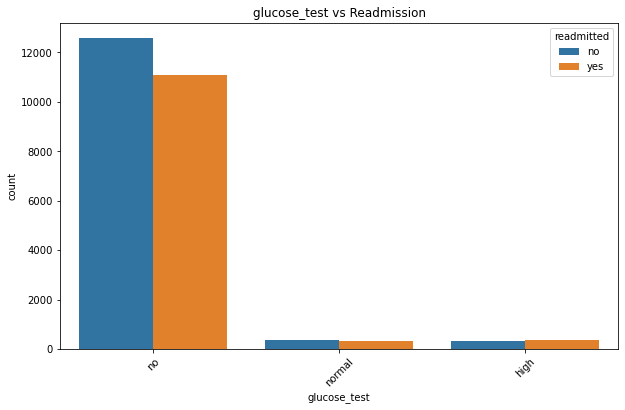

A1Ctest


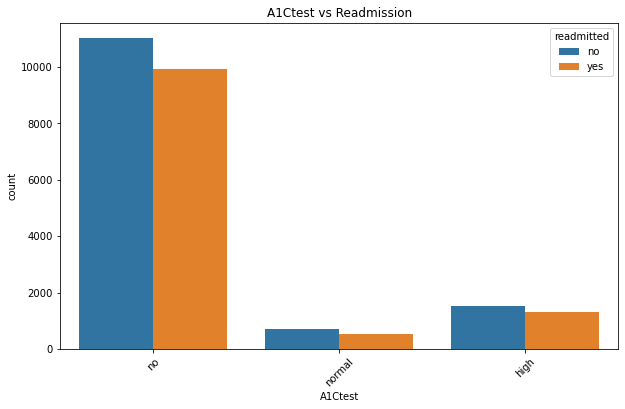

change


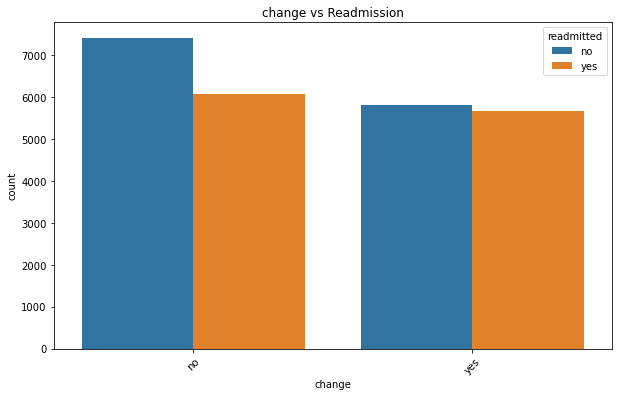

diabetes_med


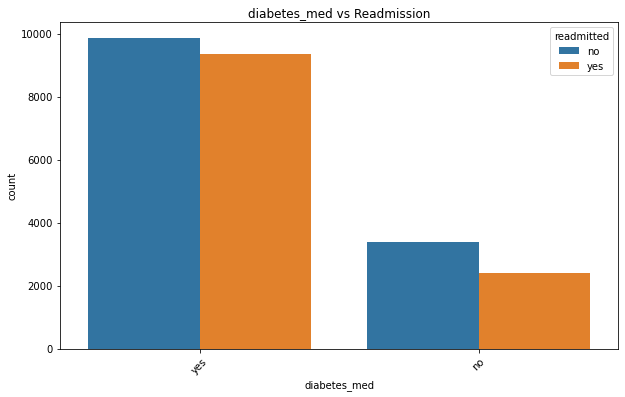

readmitted


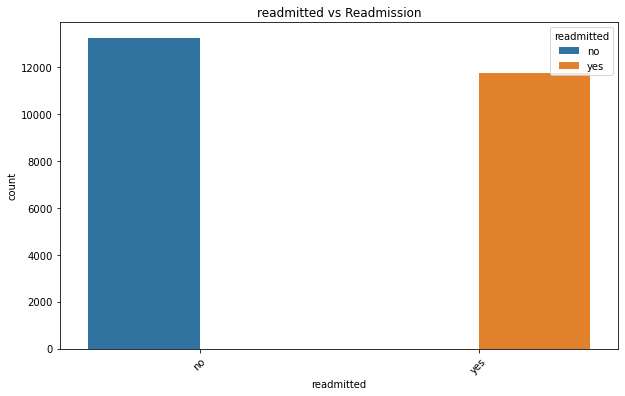

No readmitted column


In [12]:
categorical_column=data.select_dtypes(include=['object']).columns
for col in categorical_column:
    print(col)
    
    plt.figure(figsize=(10,6)) 
    sns.countplot(x=col, hue='readmitted',data=data)
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No readmitted column")

   age_encoded  medical_specialty_encoded  diag_1_encoded  diag_2_encoded  \
0            3                          4               0               7   
1            3                          5               6               6   
2            1                          4               0               0   
3            3                          4               0               6   
4            2                          3               6               0   

   diag_3_encoded  glucose_test_encoded  A1Ctest_encoded  change_encoded  \
0               6                     1                1               0   
1               6                     1                1               0   
2               0                     1                1               1   
3               1                     1                1               1   
4               7                     1                1               0   

   diabetes_med_encoded  readmitted_encoded  
0                     1           

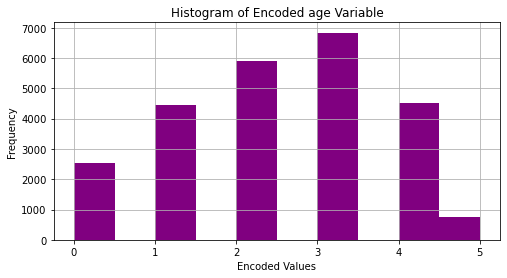

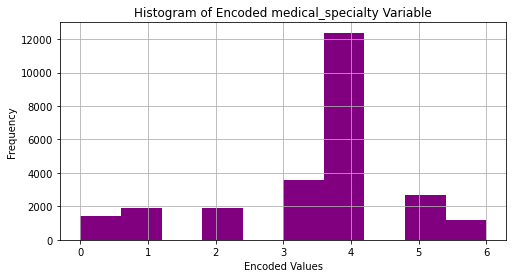

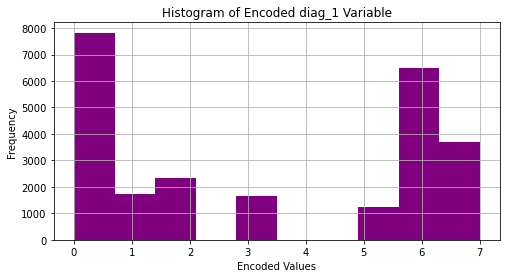

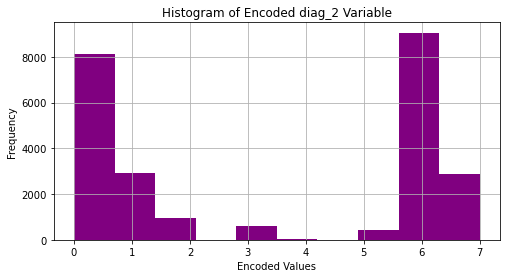

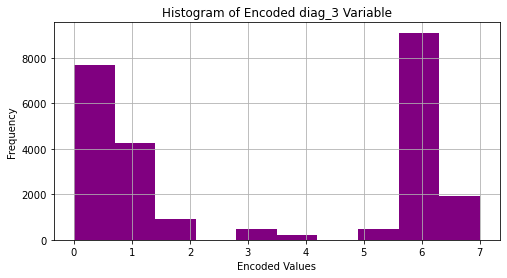

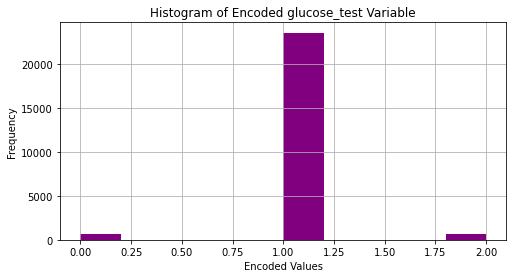

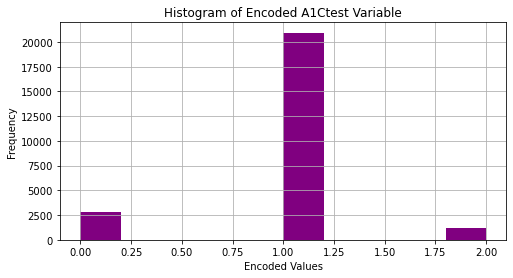

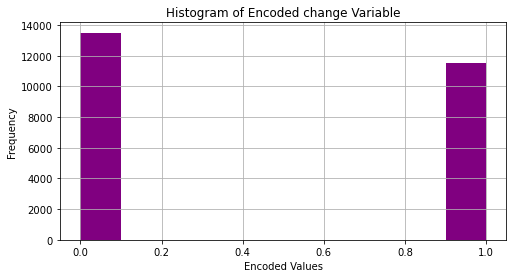

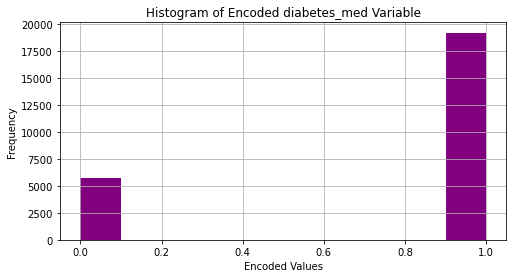

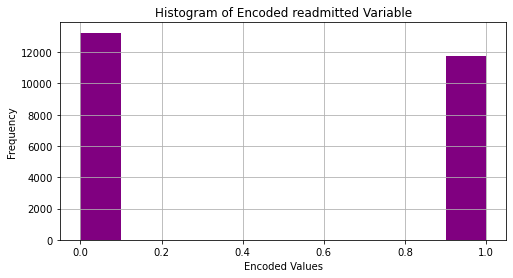

In [13]:




# Apply Label Encoding for each categorical column
for col in data.select_dtypes(include=('object', 'category')):
    encoder = LabelEncoder()
    data[col + '_encoded'] = encoder.fit_transform(data[col])

# Verify the new columns
print(data[[col + '_encoded' for col in data.select_dtypes(include=('object', 'category'))]].head())

# Display histogram for encoded columns
for col in data.select_dtypes(include=('object', 'category')):
    data[col + '_encoded'].hist(bins=10, figsize=(8, 4), color='purple')
    plt.title(f"Histogram of Encoded {col} Variable")
    plt.xlabel("Encoded Values")
    plt.ylabel("Frequency")
    plt.show()


##### Same conclusion by looking in to the heatmap plots. It shows, that while there is no significant difference btween the 
##### number of readmitted patients, comparing to various factors. 

### Descriptive Analysis of Numerical Variables

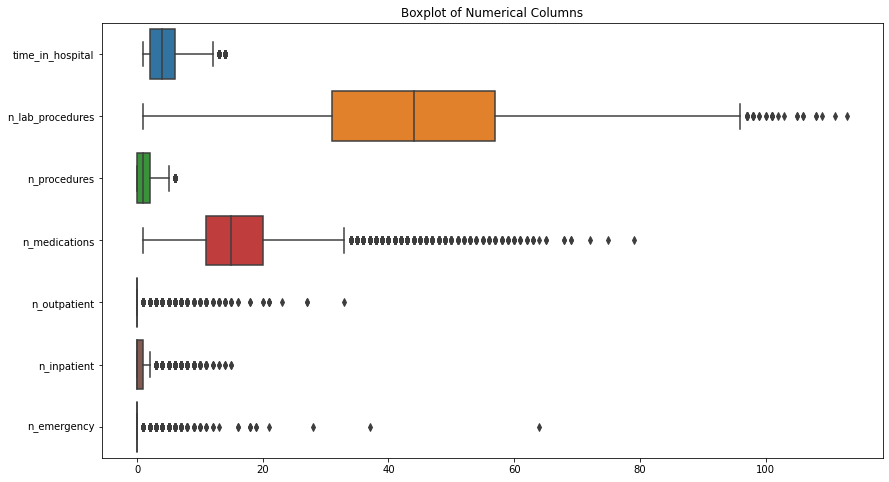

In [14]:
# Descriptive Statistics


# Select numerical columns
numerical_columns = ["time_in_hospital", "n_lab_procedures", "n_procedures", 
                     "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

# Create boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns], orient="h")
plt.title("Boxplot of Numerical Columns")
plt.show()


### time_in_hospital:

<span style="font-size: 14px;"> The IQR (box) is compact, indicating most values are within a small range.
<span style="font-size: 14px;">There are a few outliers, but the spread is small overall.
<span style="font-size: 14px;"> This suggests that most patients have short hospital stays (Less than 10 days).

### n_lab_procedures:

<span style="font-size: 14px;"> The box is much larger, showing that values for lab procedures vary widely.
<span style="font-size: 14px;"> The whiskers are long, and there are many outliers on the higher end.
<span style="font-size: 14px;"> This indicates that while most patients receive a moderate number of lab procedures, some patients receive very high numbers.

### n_procedures:

<span style="font-size: 14px;"> The box is small, and most data is concentrated around the lower range.
<span style="font-size: 14px;"> There are outliers, but the majority of the patients have fewer procedures.
<span style="font-size: 14px;"> This suggests that most patients undergo 0-2 procedures, with a few undergoing significantly more.

### n_medications:

<span style="font-size: 14px;"> The IQR is larger, and there are a high number of outliers.
<span style="font-size: 14px;"> The data is heavily skewed towards patients who received fewer medications, with extreme values for some patients.
<span style="font-size: 14px;"> This means most patients receive a smaller number of medications, but some are prescribed a very high number.

### n_outpatient:
<span style="font-size: 14px;"> The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.(more than n_inpatient)

### n_inpatient: 
<span style="font-size: 14px;"> The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.

### n_emergency:
<span style="font-size: 14px;">The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.


### Skewness: 
<span style="font-size: 14px;"> Many of the variables appear to be skewed to the right, with most values near the lower range and a few extreme high values (outliers).
### Outliers: 
<span style="font-size: 14px;">Variables like n_lab_procedures, n_medications, and visit counts (n_outpatient, n_inpatient, n_emergency) have a large number of outliers.
### Variability: 
<span style="font-size: 14px;">Variables like n_lab_procedures and n_medications show high variability (large IQR and spread).

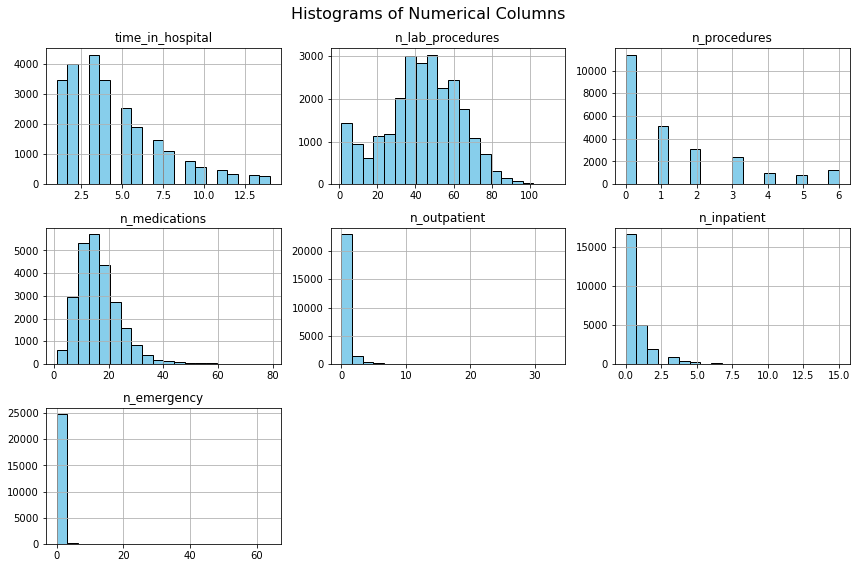

In [15]:
# Plot histograms for each column
data[numerical_columns].hist(bins=20, figsize=(12, 8), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", size=16)
plt.tight_layout()
plt.show()


### time_in_hospital:
    
<span style="font-size: 14px;">The data is right-skewed (most values are on the left, tapering off to the right).
<span style="font-size: 14px;">There is a concentration of smaller values, with fewer larger values.


### n_lab_procedures:
    
<span style="font-size: 14px;"> The data appears more normally distributed (bell-shaped).
<span style="font-size: 14px;">Values are spread symmetrically around the center.
<span style="font-size: 14px;"> This suggests that the variable has a balanced spread. 

### n_procedures:
    
<span style="font-size: 14px;">This histogram shows a strong right skew with many values near zero.
<span style="font-size: 14px;">A few higher values appear as spikes, which could be outliers or uncommon high occurrences.


### n_medications:

<span style="font-size: 14px;">The data is right-skewed and concentrated at smaller values.
<span style="font-size: 14px;">There are very few higher values.

### n_outpatient:
    
<span style="font-size: 14px;">This histogram shows an extreme right skew with nearly all values near zero.
<span style="font-size: 14px;">Only a small number of higher values exist.

### n_inpatient
<span style="font-size: 14px;">Similar to the n_lab_procedures histogram, this is highly right-skewed.
<span style="font-size: 14px;">Most values are close to zero, but there are rare higher values.


### n_emergency
<span style="font-size: 14px;">The distribution is extremely right-skewed, with almost all values concentrated at zero.
<span style="font-size: 14px;"> Very few occurrences exist for higher values.

This plot providing insights into their distributions and correlations.

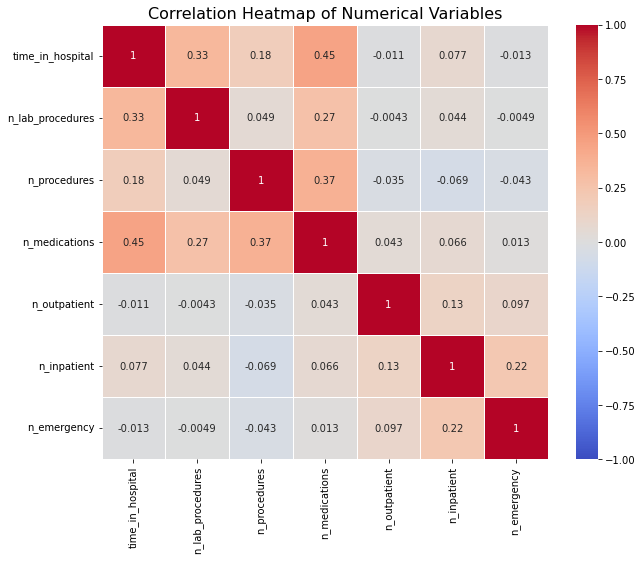

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust figure size

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,             # Display correlation values
            cmap="coolwarm",        # Color palette: blue for negative, red for positive
            center=0,               # Center the color bar at 0
            linewidths=0.5,         # Add lines between cells
            vmin=-1, vmax=1)        # Fix color scale from -1 to 1

# Add a title
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

# Show the plot
plt.show()


<span style="font-size: 14px;"> The correlation between n_medications and time_in_hospital, n_lab_procedures and n_medications, n_procedures and n_medications is higher 
<span style="font-size: 14px;"> than the correlation between other variables. whihc it makes sense. in other words, as the n_lab_procedures,n_procedures
<span style="font-size: 14px;">  and time_in_hospital is higher, the n_medications is higher for the patiens. however this correlation is less than 50%.  

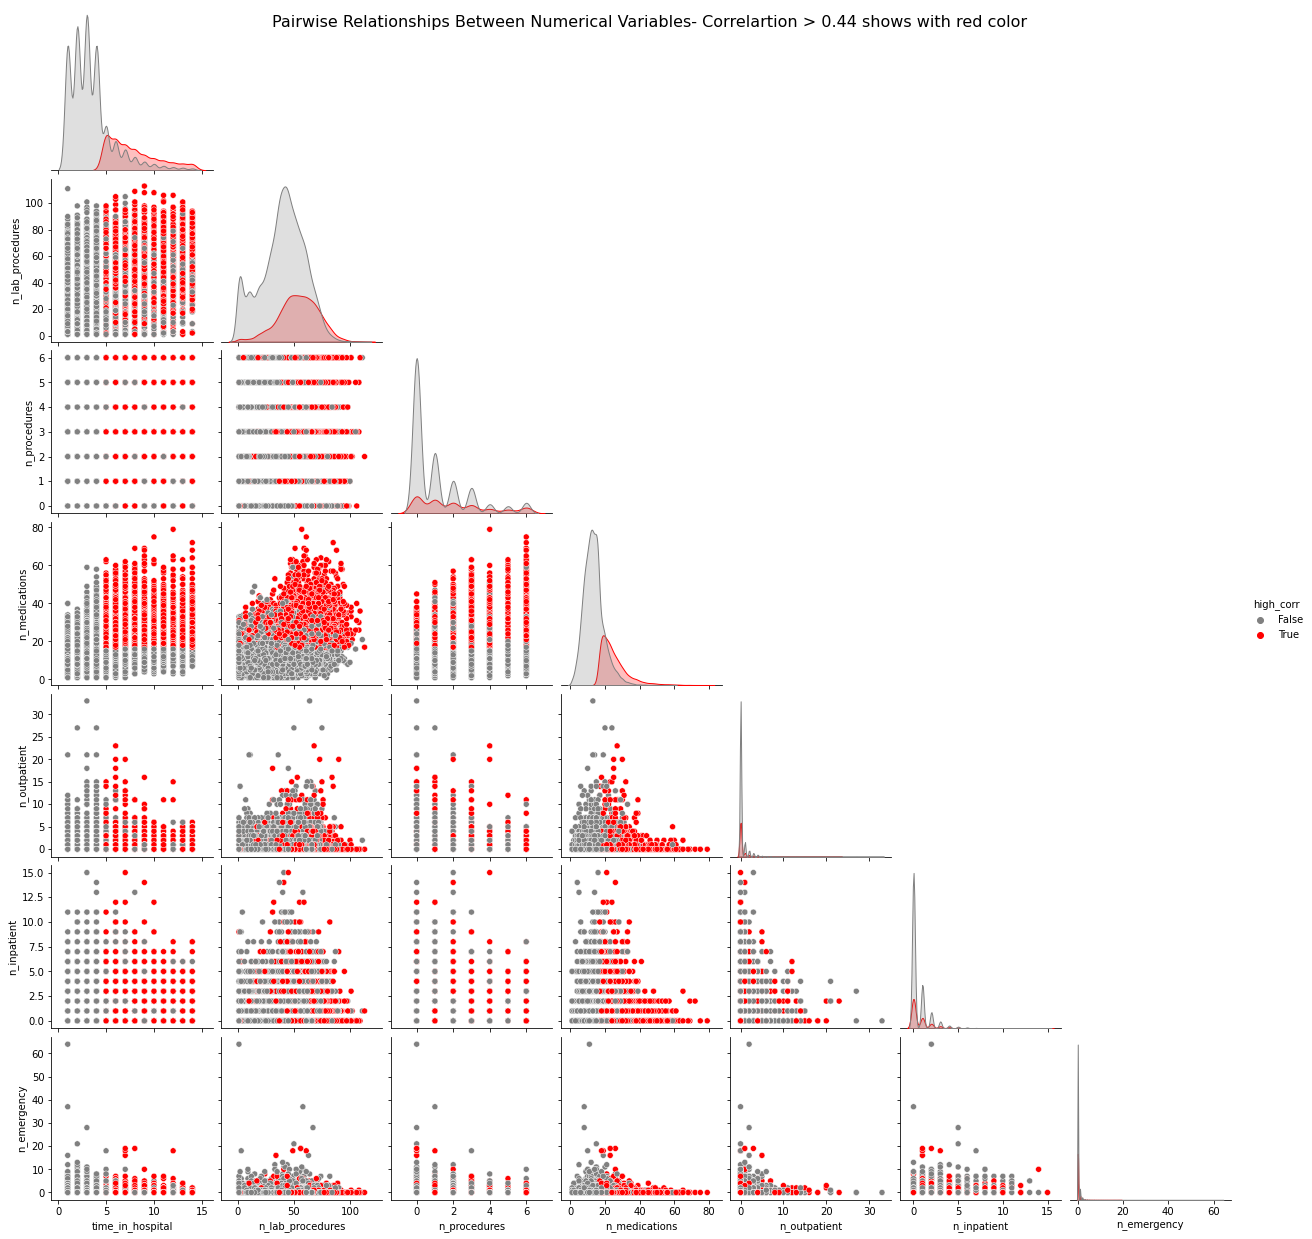

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing these columns
numerical_columns = ["time_in_hospital", "n_lab_procedures", "n_procedures", 
                     "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

# Compute correlation matrix
corr_matrix = data[numerical_columns].corr()

# Identify pairs with high correlation
threshold = 0.44
high_corr_pairs = [
    (i, j) for i in numerical_columns for j in numerical_columns
    if i != j and abs(corr_matrix.loc[i, j]) > threshold
]

# Create a column to highlight high correlations
data['high_corr'] = False  # Default is no high correlation

if high_corr_pairs:
    # Highlight rows involved in high correlation pairs
    for col1, col2 in high_corr_pairs:
        data['high_corr'] = data['high_corr'] | (
            (data[col1] > data[col1].mean()) & (data[col2] > data[col2].mean())
        )

# Pairplot with color for high correlation
pairplot = sns.pairplot(
    data=data,
    vars=numerical_columns,  # Use your actual numerical columns
    hue="high_corr",  # Use the 'high_corr' column for coloring
    kind="scatter",  # Use scatter for better visualization
    diag_kind="kde",  # Kernel density estimation for diagonals
    corner=True,  # Only plot lower triangle
    palette={True: "red", False: "gray"}  # Red for high correlation, gray otherwise
)

# Add title
plt.suptitle("Pairwise Relationships Between Numerical Variables- Correlartion > 0.44 shows with red color", size=16)
plt.show()


##### time_in_hospital and n_medications (correlation = 0.449415) show a moderate positive correlation.
This suggests that patients who stay longer in the hospital tend to have more medications.

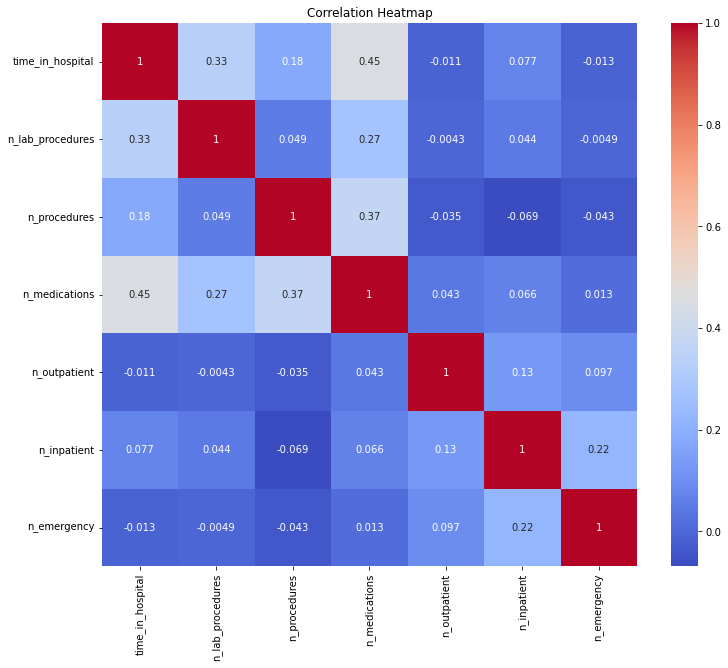

In [18]:
#4- Correlation analysis

corr_matrix=data[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Matrix:
                   time_in_hospital  n_lab_procedures  n_procedures  \
time_in_hospital          1.000000          0.328326      0.179249   
n_lab_procedures          0.328326          1.000000      0.048827   
n_procedures              0.179249          0.048827      1.000000   
n_medications             0.449415          0.271741      0.368681   
n_outpatient             -0.011309         -0.004309     -0.034796   
n_inpatient               0.076916          0.043713     -0.069078   
n_emergency              -0.013115         -0.004929     -0.042906   

                  n_medications  n_outpatient  n_inpatient  n_emergency  
time_in_hospital       0.449415     -0.011309     0.076916    -0.013115  
n_lab_procedures       0.271741     -0.004309     0.043713    -0.004929  
n_procedures           0.368681     -0.034796    -0.069078    -0.042906  
n_medications          1.000000      0.043185     0.065572     0.012944  
n_outpatient           0.043185      1.000000   

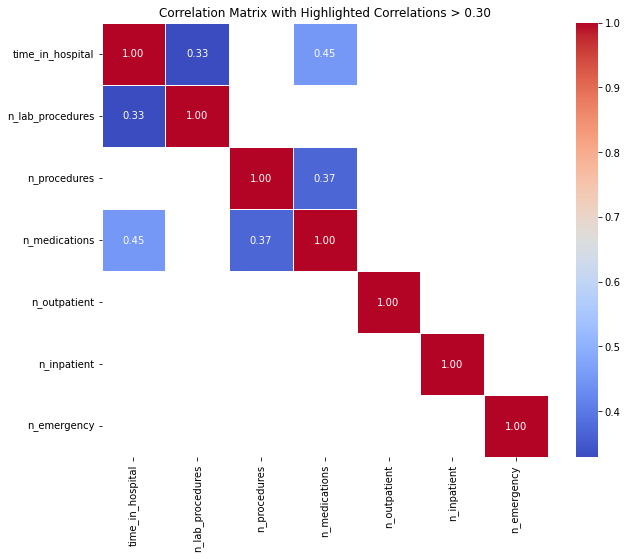

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the correlation matrix and high correlation pairs
print("Correlation Matrix:\n", corr_matrix)
print("High Correlation Pairs:", high_corr_pairs)

# Define the threshold for highlighting
highlight_threshold = 0.30

# Plot the heatmap with correlations greater than 0.3 highlighted
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,             # Display correlation values
    cmap="coolwarm",        # Color gradient
    mask=corr_matrix.abs() < highlight_threshold,  # Mask values below the threshold
    cbar=True,              # Show color bar
    fmt=".2f",              # Format correlation values
    linewidths=0.5          # Add gridlines between cells
)
plt.title("Correlation Matrix with Highlighted Correlations > 0.30")
plt.show()


### 1.Positive Correlations
###### time_in_hospital and n_medications (0.44):
<span style="font-size: 14px;">This indicates a moderate positive relationship, suggesting that longer hospital stays are associated with a higher number of medications administered.</span>
###### tn_procedures and n_medications (0.36):
<span style="font-size: 14px;">There is a moderate positive relationship here as well, meaning that more procedures tend to correspond with a higher number of medications.
###### time_in_hospital and n_lab_procedures (0.32):
<span style="font-size: 14px;">A weak-to-moderate positive relationship indicates that longer hospital stays are associated with more lab procedures.
###### n_inpatient and n_emergency (0.22):
<span style="font-size: 14px;">This weak positive correlation suggests that patients with more inpatient visits tend to have slightly more emergency visits.
### 2. Weak or Negligible Correlations
##### tn_outpatient and time_in_hospital (-0.011):
<span style="font-size: 14px;">Negligible correlation indicates no meaningful relationship between the number of outpatient visits and hospital stay length.
###### tn_procedures and n_emergency (-0.043):
###### Very weak negative correlation suggests no significant association between the number of procedures and emergency visits.
###### tn_lab_procedures and n_outpatient (-0.004):
<span style="font-size: 14px;">Essentially no relationship between these two variables.
### 3. Key Highlight: High Correlation Pairs
<span style="font-size: 14px;">ttime_in_hospital and n_medications (0.449):
<span style="font-size: 14px;">Among the given pairs, this is the strongest correlation. It underscores a meaningful relationship where patients staying longer in the hospital receive more medications.
#### Insights:
<span style="font-size: 14px;">Variables related to hospital stays (e.g., time_in_hospital) tend to have stronger relationships with clinical procedures (n_lab_procedures, n_procedures) and medications (n_medications).
<span style="font-size: 14px;">Outpatient and emergency metrics (n_outpatient, n_emergency) generally show weak correlations with most other variables, potentially indicating that they measure different aspects of patient care.

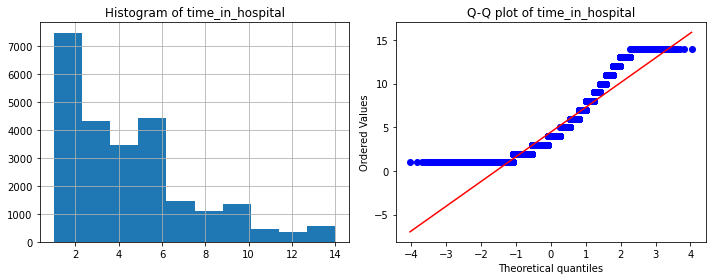

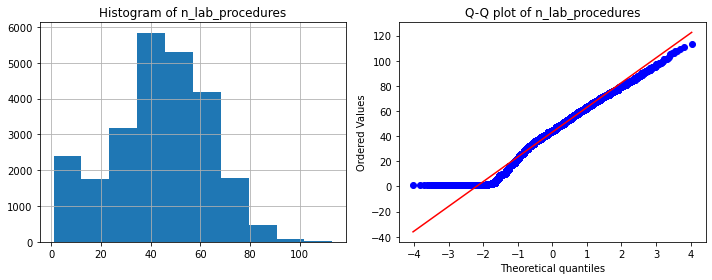

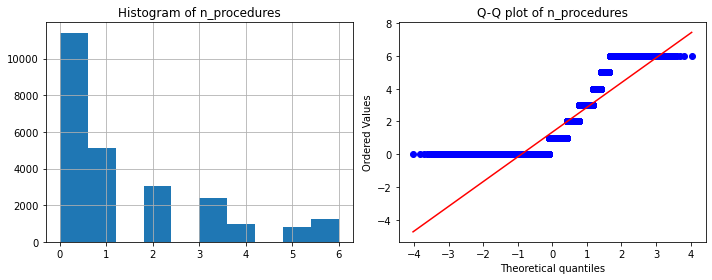

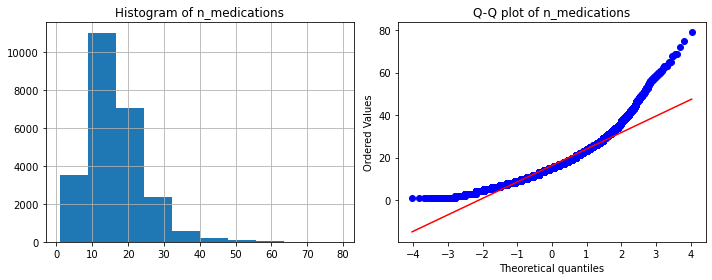

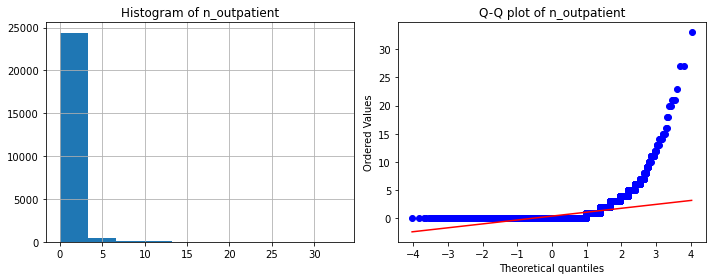

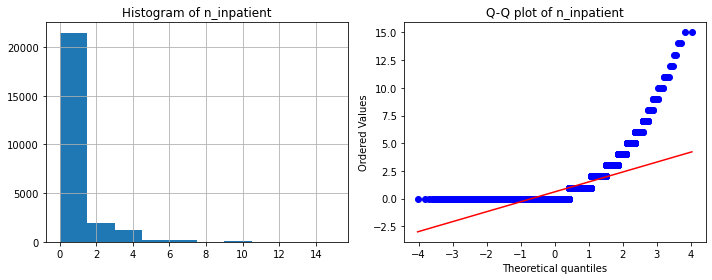

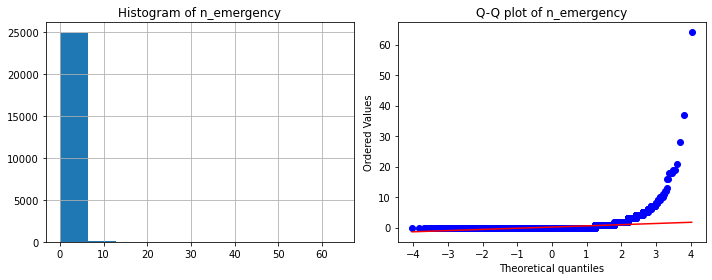

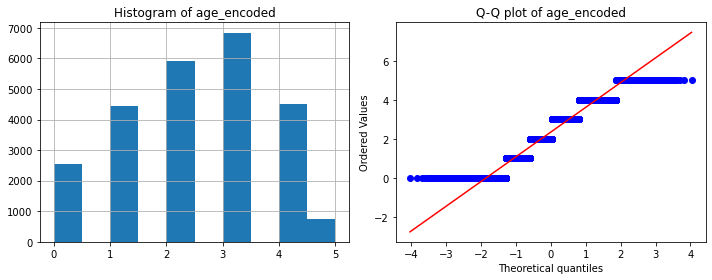

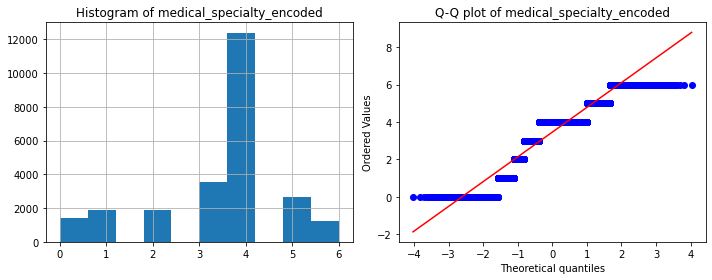

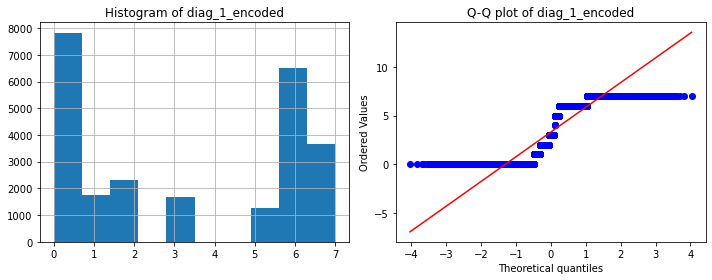

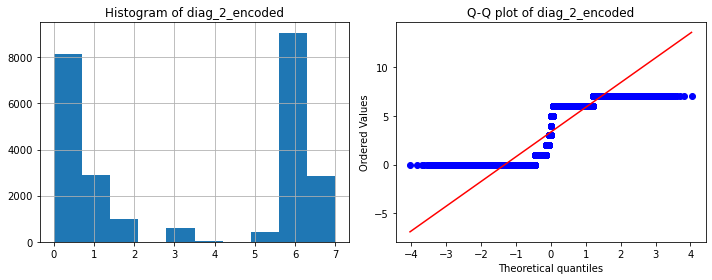

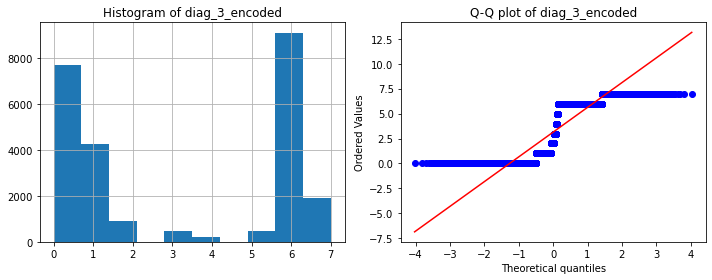

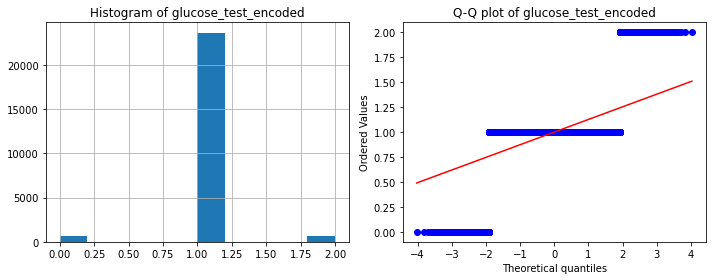

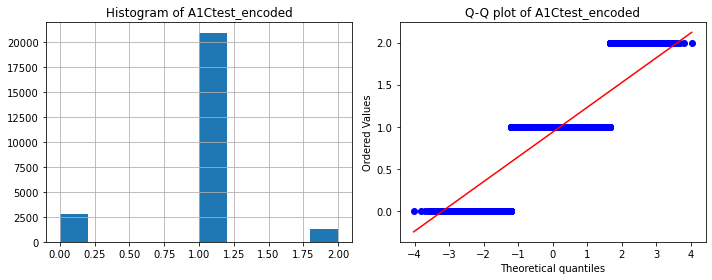

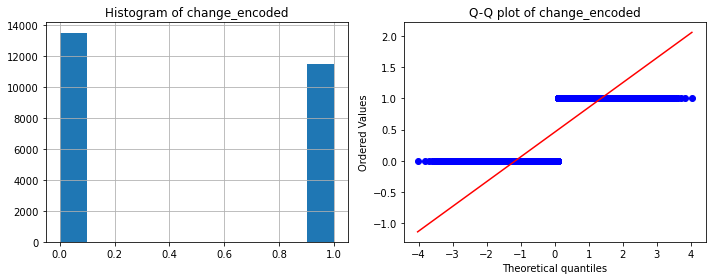

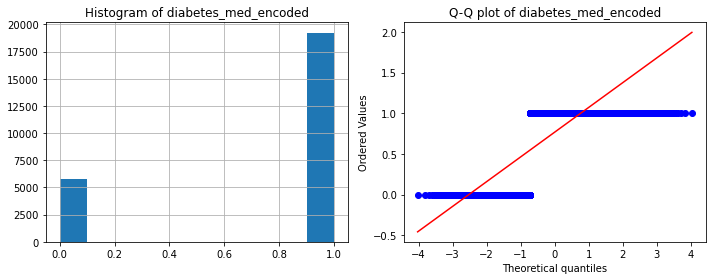

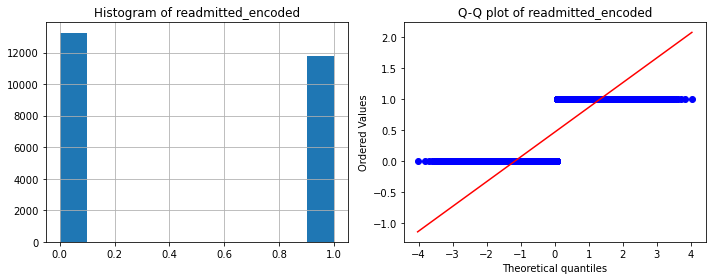

In [20]:
#3- Distribution analysis
numerical_columns=data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    data[col].hist()
    plt.title(f'Histogram of {col}')
    plt.subplot(122)
    stats.probplot(data[col], dist="norm",plot=plt)
    plt.title(f'Q-Q plot of {col}')
    plt.tight_layout()
    plt.show()

#### time_in_hospital:
<span style="font-size: 14px;">The data shows some deviation from normality.The highest number of patients spend time between 1-2 days in the hospital.</span>

#### n_lab_procedures
<span style="font-size: 14px;"> Both the histogram and Q-Q plot confirm that n_lab_procedures is not normally distributed due to the right skew.
<span style="font-size: 14px;">The distribution shows positive skewness, with a small number of patients receiving a much higher number of lab procedures.
<span style="font-size: 14px;"> Observations at the upper end of the histogram and Q-Q plot suggest the potential for outliers.

#### n_procedures
<span style="font-size: 14px;"> The "stepped" pattern in the Q-Q plot is due to the discrete nature of n_procedures, with many identical values (e.g., 0, 1, 2, etc.).
<span style="font-size: 14px;">Both the histogram and Q-Q plot indicate that n_procedures is heavily skewed to the right, with a concentration of low values.
<span style="font-size: 14px;"> The data is not normally distributed due to the skewness and discrete values, as shown by the deviations in the Q-Q plot.
<span style="font-size: 14px;"> The variable is count-based (number of procedures), leading to the stepped pattern in the Q-Q plot and the discrete nature of the histogram.

  #### n_medication
   
<span style="font-size: 14px;">The data is highly skewed to the right. There are outliers at the lower and higher ranges. 
    the central part of the data is not too far from normal.
    
 #### n_outpatient   
<span style="font-size: 14px;">This pattern suggests that the data has positive skewness.
<span style="font-size: 14px;">Based on the Q-Q plot;
<span style="font-size: 14px;">Points in the upper-right corner deviate significantly above the red <span style="font-size: 14px;">line, indicating heavy tails or outliers in the higher range.
<span style="font-size: 14px;">Deviation in the lower-left: Points in the lower-left also deviate below the red line, <span style="font-size: 14px;">suggesting skewness or outliers in the lower range.
<span style="font-size: 14px;">The middle quantiles (closer to the center) slightly align with the red line, indicating that <span style="font-size: 14px;">the central part of the data is not too far from normal.
    
    
    
 #### n_inpatient    

<span style="font-size: 14px;">The distribution is highly right-skewed.
Most of the data is concentrated near zero or very low values, with a sharp decline as values increase.
<span style="font-size: 14px;">Q-Q Plot:
The Q-Q plot reinforces the right-skewness seen in the histogram:
Lower quantiles: The points are far below the red line, indicating the data has smaller-than-expected values compared to a normal distribution.
Upper quantiles: The points diverge sharply upwards at the tail, showing that the data has extreme outliers or heavy tails in the higher range.
Most of the points deviate significantly from the red line, confirming that the data is far from normal.
Key Observations
<span style="font-size: 14px;"> In general, the data is not normally distributed and exhibits significant right skewness with extreme values in the tail.

 #### n_emergency


<span style="font-size: 14px;">The data distribution is extremely right-skewed. Almost all values are clustered near zero, with <span style="font-size: 14px;">very few large values causing a long tail to the right.
    This data is highly skewed and not normally distributed, with extreme outliers in the upper range.


Based on the distribution of the numerical values, they are mostly don't have a normal distribution and they are mostly sskewed to the right. In order to reduce the skewness and get a more symmetric data, will transform the data in the next part.
    


## Transformation

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

# Example DataFrame
# Replace `data` with your actual DataFrame
data_summary = pd.DataFrame({
    "Column": data.columns,
    "Data Type": data.dtypes,
    "Missing Values": data.isnull().sum()
})
data_summary.reset_index(drop=True, inplace=True)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Log Transformation (only for positive values)
data_log = data[numerical_columns].apply(lambda x: np.log1p(x) if (x > 0).all() else x)

# Square Root Transformation (non-negative values)
data_sqrt = data[numerical_columns].apply(lambda x: np.sqrt(x) if (x >= 0).all() else x)

# Box-Cox or Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' if all values are positive
data_transformed = pd.DataFrame(
    pt.fit_transform(data[numerical_columns]),
    columns=numerical_columns
)

# Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Standardization (Z-Score)
scaler_standard = StandardScaler()
data_standardized = pd.DataFrame(scaler_standard.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Add the transformed data to the original DataFrame or create new columns
data[numerical_columns + '_log'] = data_log
# Add square root-transformed columns
data[numerical_columns + '_sqrt'] = data_sqrt

# Add Yeo-Johnson transformed columns
data[numerical_columns + '_yeoj'] = data_transformed

# Add Min-Max scaled columns
data[numerical_columns + '_scaled'] = data_scaled

# Add Standardized columns
data[numerical_columns + '_standardized'] = data_standardized

In [22]:
print(data)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

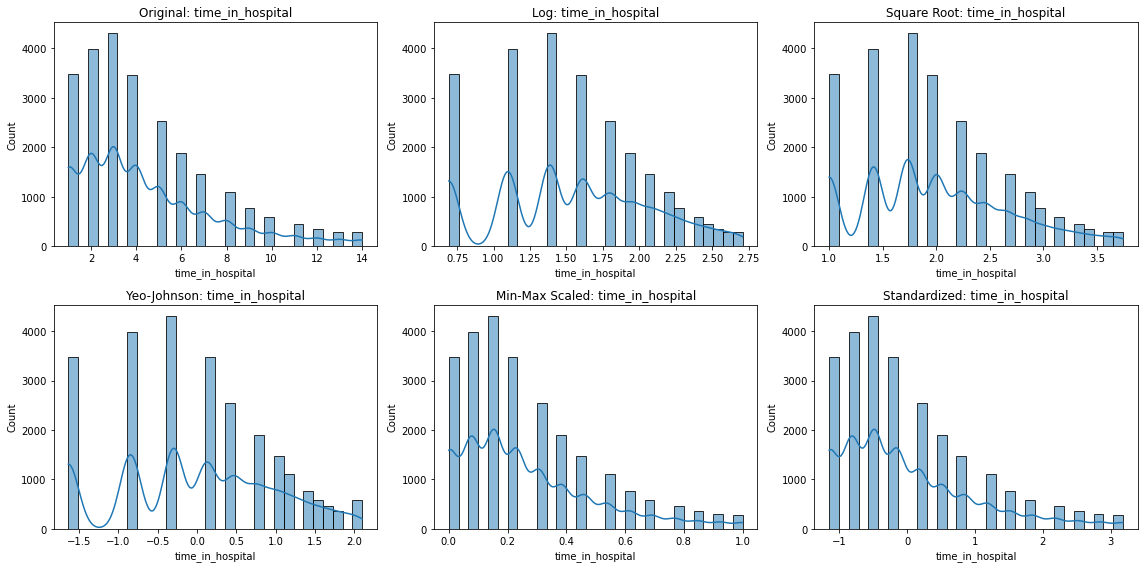

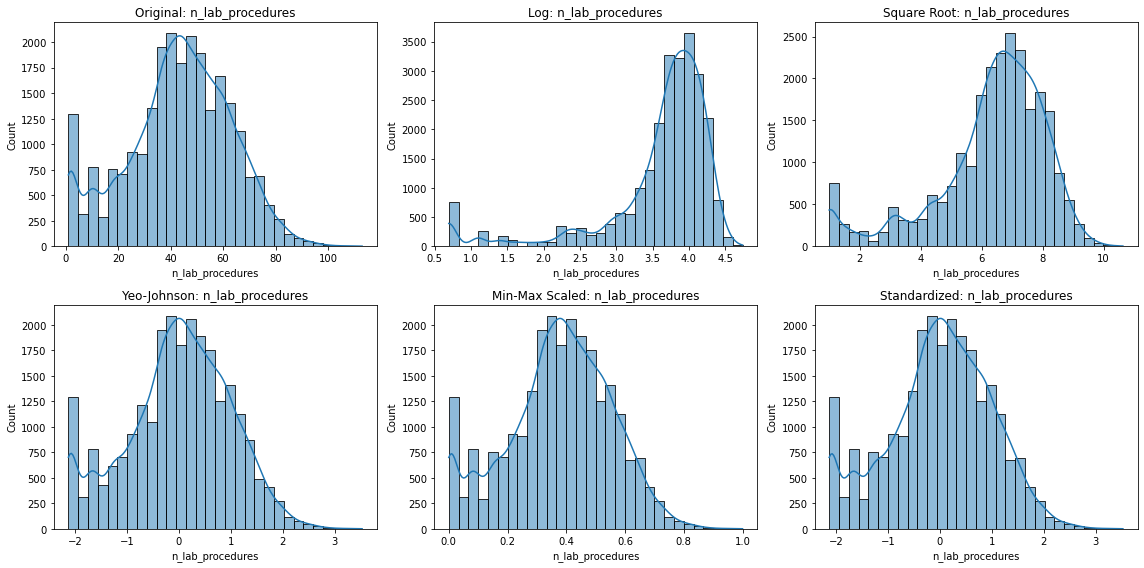

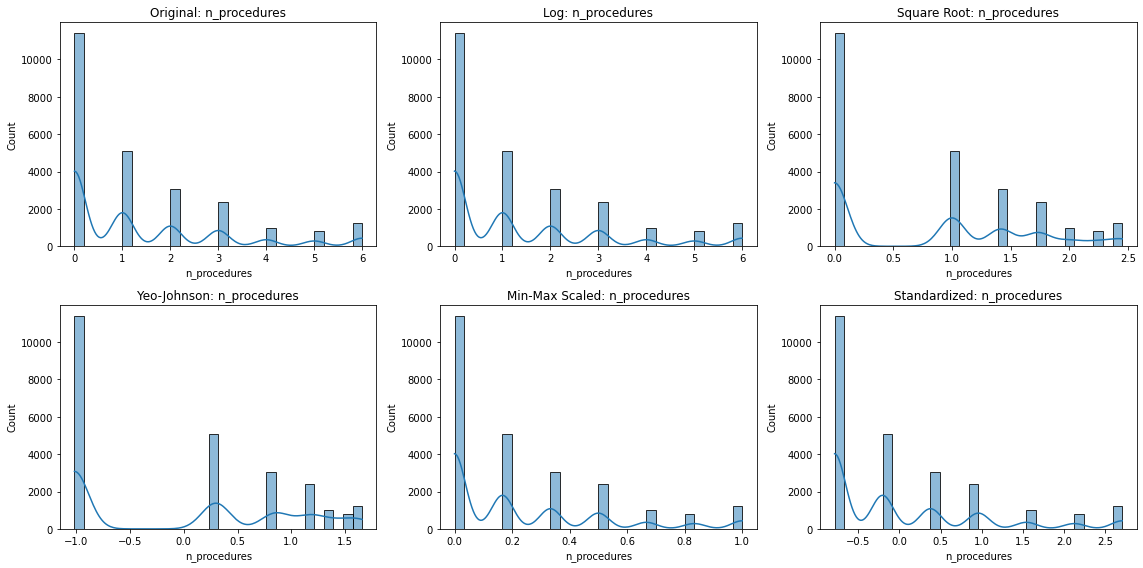

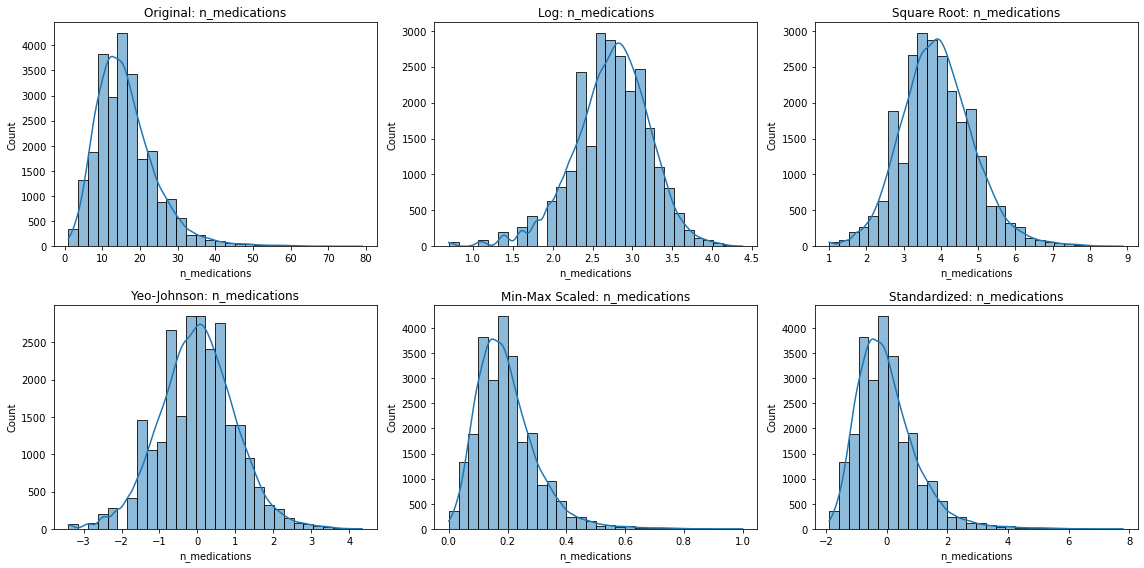

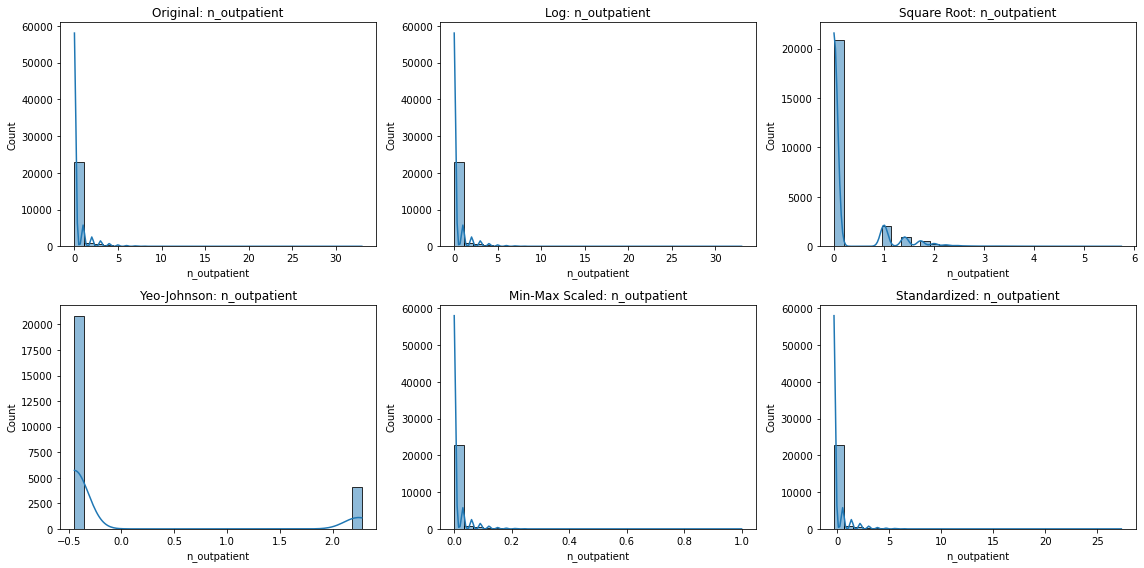

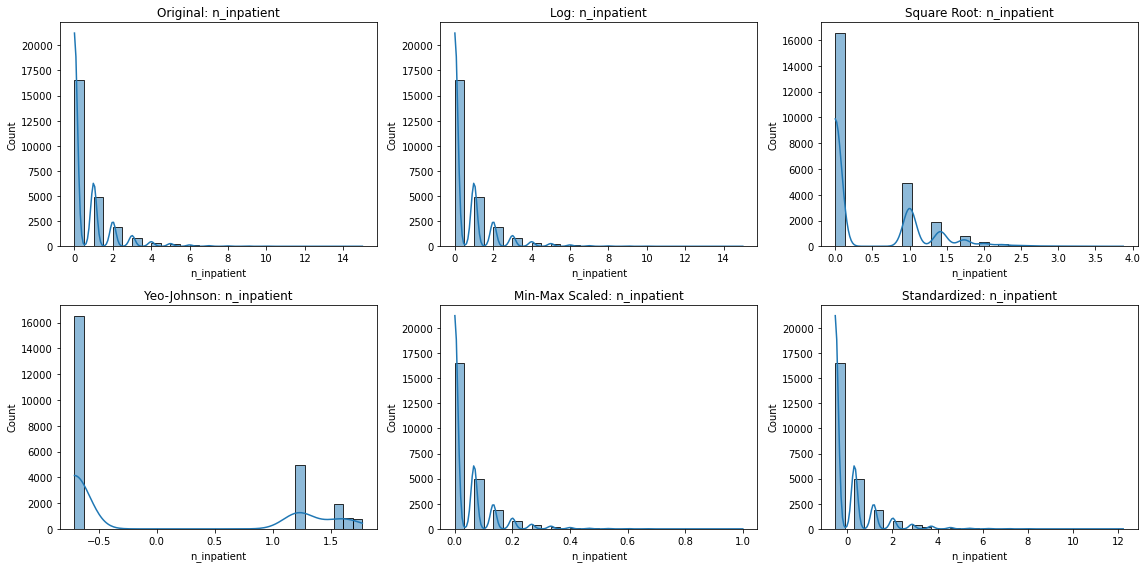

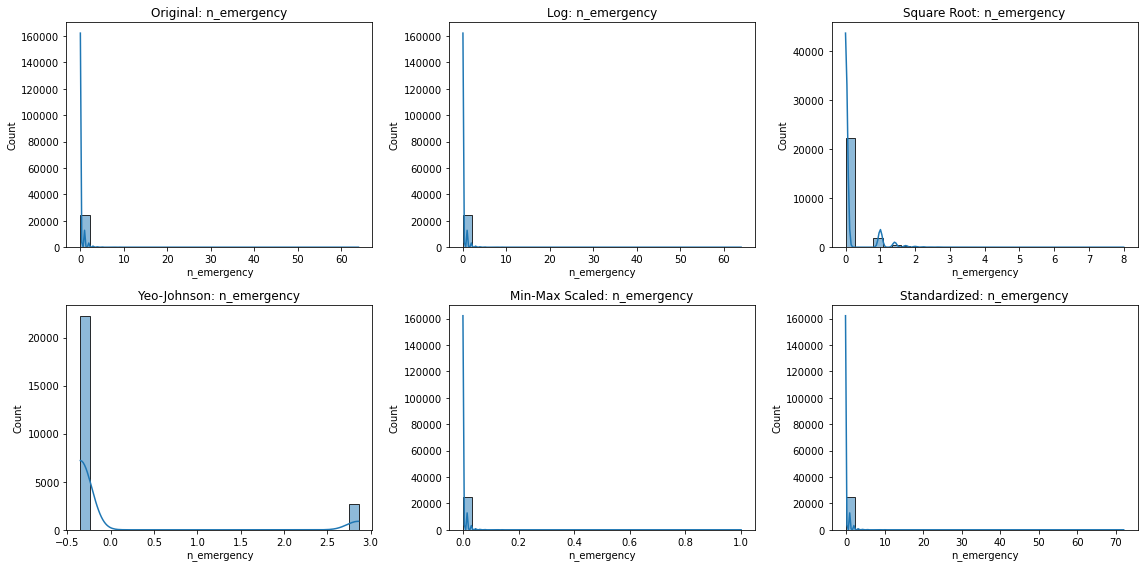

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed datasets
transformed_datasets = {
    'Log': data_log,
    'Square Root': data_sqrt,
    'Yeo-Johnson': data_transformed,
    'Min-Max Scaled': data_scaled,
    'Standardized': data_standardized
}

# Plot histograms for original and each transformed dataset
for col in numerical_columns:
    plt.figure(figsize=(16, 8))
    
    # Plot original data
    plt.subplot(2, 3, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Original: {col}')
    
    # Plot each transformed data
    for i, (transformation, transformed_data) in enumerate(transformed_datasets.items(), 2):
        plt.subplot(2, 3, i)
        sns.histplot(transformed_data[col], kde=True, bins=30)
        plt.title(f'{transformation}: {col}')
    
    plt.tight_layout()
    plt.show()


<Figure size 1008x576 with 0 Axes>

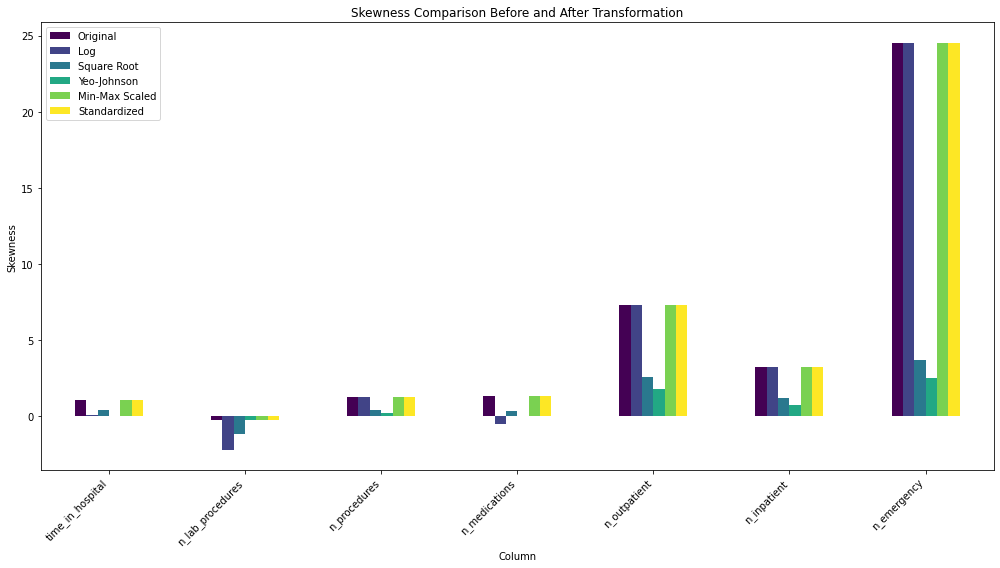

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro

# Calculate Skewness for each transformation (including original)
skewness_original = data[numerical_columns].skew()
skewness_transformed = {
    'Log': data_log.skew(),
    'Square Root': data_sqrt.skew(),
    'Yeo-Johnson': data_transformed.skew(),
    'Min-Max Scaled': data_scaled.skew(),
    'Standardized': data_standardized.skew()
}

# Collect skewness data into a DataFrame for visualization
skewness_df = pd.DataFrame({
    'Column': numerical_columns,
    'Original': skewness_original,
    'Log': skewness_transformed['Log'],
    'Square Root': skewness_transformed['Square Root'],
    'Yeo-Johnson': skewness_transformed['Yeo-Johnson'],
    'Min-Max Scaled': skewness_transformed['Min-Max Scaled'],
    'Standardized': skewness_transformed['Standardized']
})

# Plot Skewness comparison
plt.figure(figsize=(14, 8))
skewness_df.set_index('Column').plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Skewness Comparison Before and After Transformation')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





###### *** Yeo-Johnson and Square Root methods are the winners. The skewness has reduced significantly compare to other methods. 

# Target Variable Analysis


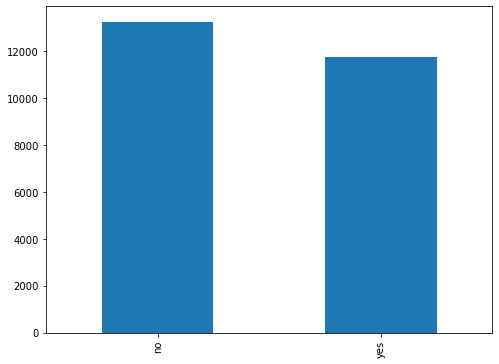

In [25]:
#5- Target variable analysis

if 'readmitted' in data.columns:
    plt.figure(figsize=(8,6))
    data['readmitted'].value_counts().plot(kind='bar')
    plt.show()
else:
    print("No readmitted column in dataframe")

###### The target variable, readmitted, has two categor "Yes" and "No", and the distribution of values in these two categories is very close. 
###### In other word, it seems that half of the population of this case study were readmitted and half not. 